---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [120]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    bc = np.bincount(df['Class'])
    result = bc[1]/(bc[0]+bc[1])
    return result

answer_one()

0.016410823768035772

In [123]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7681,-1.332095,0.828224,1.280394,-0.000192,0.006864,0.193420,0.065110,-0.694045,0.020374,0.275932,...,-0.361099,0.632575,-0.286266,0.283056,0.019710,-0.570700,0.409895,-0.669576,-0.374803,4.00
21329,1.900589,-0.850905,-0.856684,0.419809,-0.329338,0.512227,-0.644830,0.083636,-0.622460,1.100660,...,-0.393216,-0.234496,-0.263067,0.151624,0.170524,-0.142015,-0.703641,0.049886,-0.021393,96.00
14695,2.242056,-1.496697,-1.006464,-1.448708,-1.440162,-1.035270,-1.011986,-0.251838,-1.060550,1.598898,...,-0.443243,-0.170011,-0.090092,0.194057,-0.155795,-0.199022,-0.153737,-0.005144,-0.049103,50.00
12338,-0.308109,1.107050,-0.184132,-0.528948,1.000317,-0.517253,0.935125,0.012976,-0.150110,-1.081891,...,0.055325,0.044064,0.465492,-0.370183,-0.561096,-0.152336,0.590986,0.376048,0.248322,3.79
17768,-1.405410,1.985541,-1.290536,-1.672087,1.133642,-1.327069,1.839333,-0.605819,1.243372,2.321808,...,0.881069,-0.058432,0.731687,-0.273287,-0.427056,-0.032592,0.073411,0.779993,0.247911,1.54


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [124]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    acc = dummy_majority.score(X_test, y_test)
    rec = recall_score(y_test, y_dummy_predictions)
    result = (acc, rec)
    return result

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [126]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    clf = SVC()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = clf.score(X_test, y_test)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    result = (acc, rec, prec)
    return result

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [127]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    clf = SVC(C = 1e9, gamma = 1e-07, probability = True)
    clf.fit(X_train, y_train)
    threshold = -220
    y_pred = 1*(clf.decision_function(X_test) >= threshold)
    result = confusion_matrix(y_test, y_pred)
    return result

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


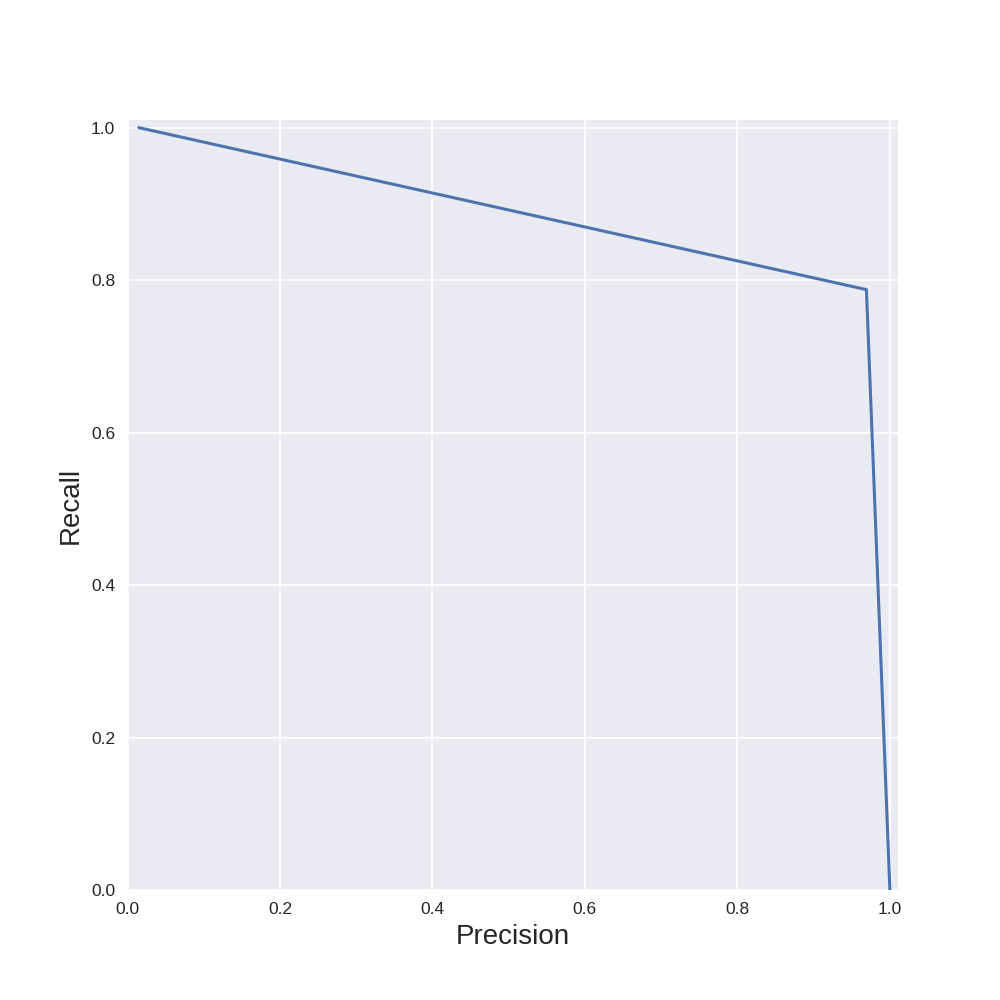

<IPython.core.display.Javascript object>


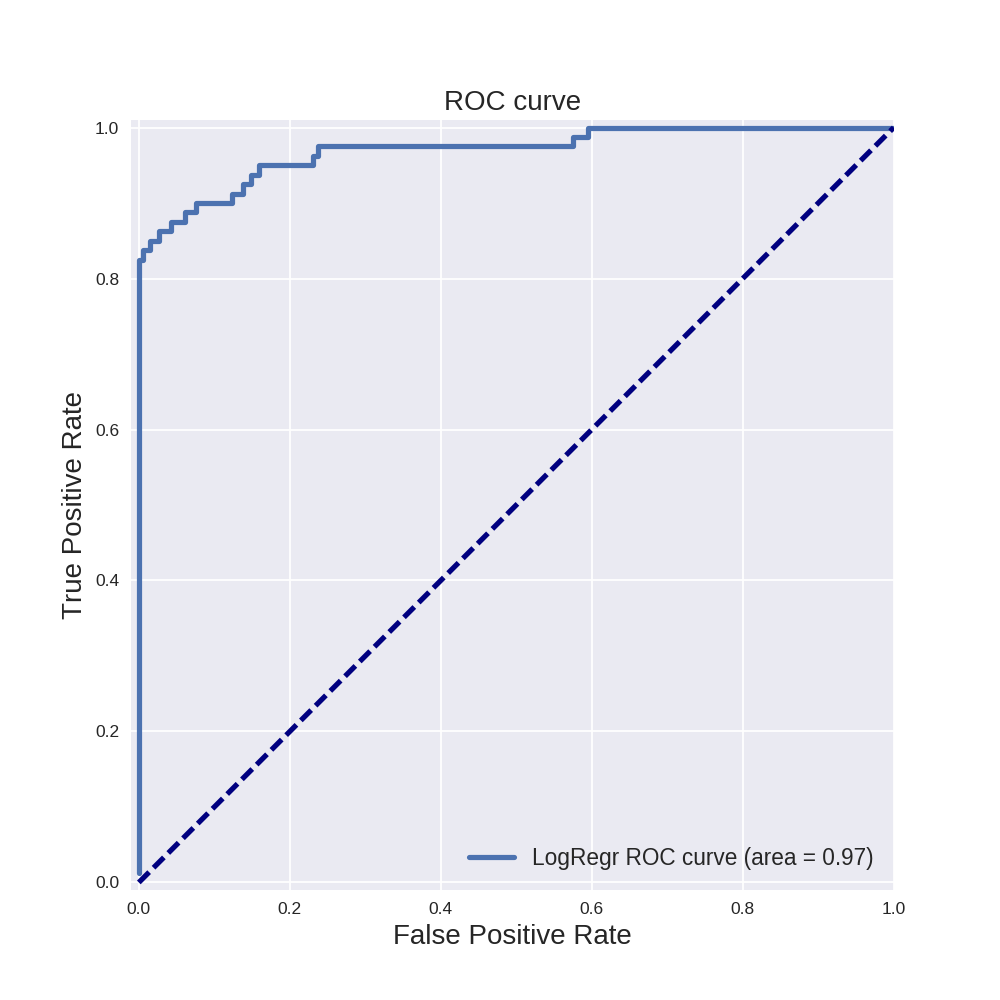

In [128]:
def answer_five():
    result = tuple([0.85, 0.9])
    return result


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_scores_lr = lr.predict(X_test)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)

# Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# ROC curve
from sklearn.metrics import roc_curve, auc

y_score_dec = lr.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_dec)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [130]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
    grid_clf_acc.fit(X_train, y_train)
    #y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 
    res = grid_clf_acc.cv_results_
    mean_test = np.mean((res['split0_test_score'], res['split1_test_score'], res['split2_test_score']), axis=0)
    df = pd.DataFrame(np.column_stack((res['param_penalty'].data, res['param_C'].data, mean_test)), columns=['norm','C','score'])
    result = df.pivot(index='C', columns='norm', values='score').values.astype('float')
    return result

answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


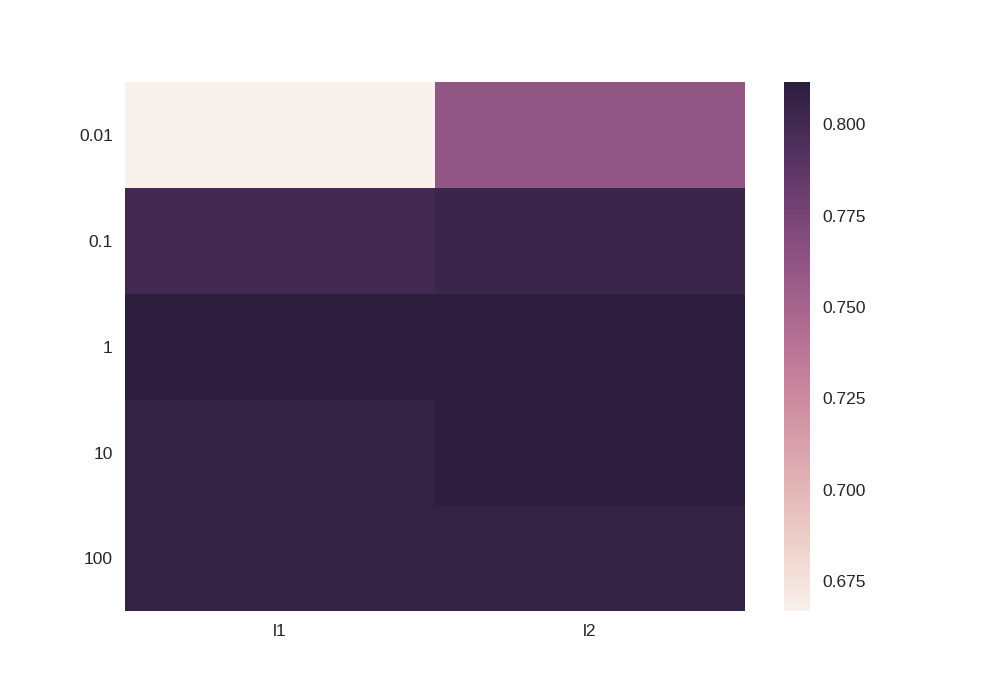

In [119]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())